# Data Normalization Techniques Hands on

Welcome to this hands on. It covers the python implementation of the following techniques for normalising data:

• Feature Scaling

• Feature Clipping

• Log Transformation

• Z-Score Normalisation

# 1 Feature Scaling

Let us begin by feature scaling. To download the data for this task, click [here](https://www.kaggle.com/datasets/elikplim/eergy-efficiency-dataset)

We proceed by installing the required libraries and creating a DataFrame.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Note:Before using further code edit excel sheet column name from "x1" to desired name given on kaggle and then read the file or else further you get error.

In [11]:
build= pd.read_csv("ENB2012_data.csv")

This dataset is about building having features such as ‘Relative Compactness’, ‘Surface Area’, ‘Wall Area’, etc. Other features can be seen by looking at the column labels of the DataFrame.

In [13]:
x = build[['Relative Compactness','Surface Area']]

Histograms can be readily plotted from DataFrame using .hist() as shown below.

array([[<Axes: title={'center': 'Relative Compactness'}>,
        <Axes: title={'center': 'Surface Area'}>]], dtype=object)

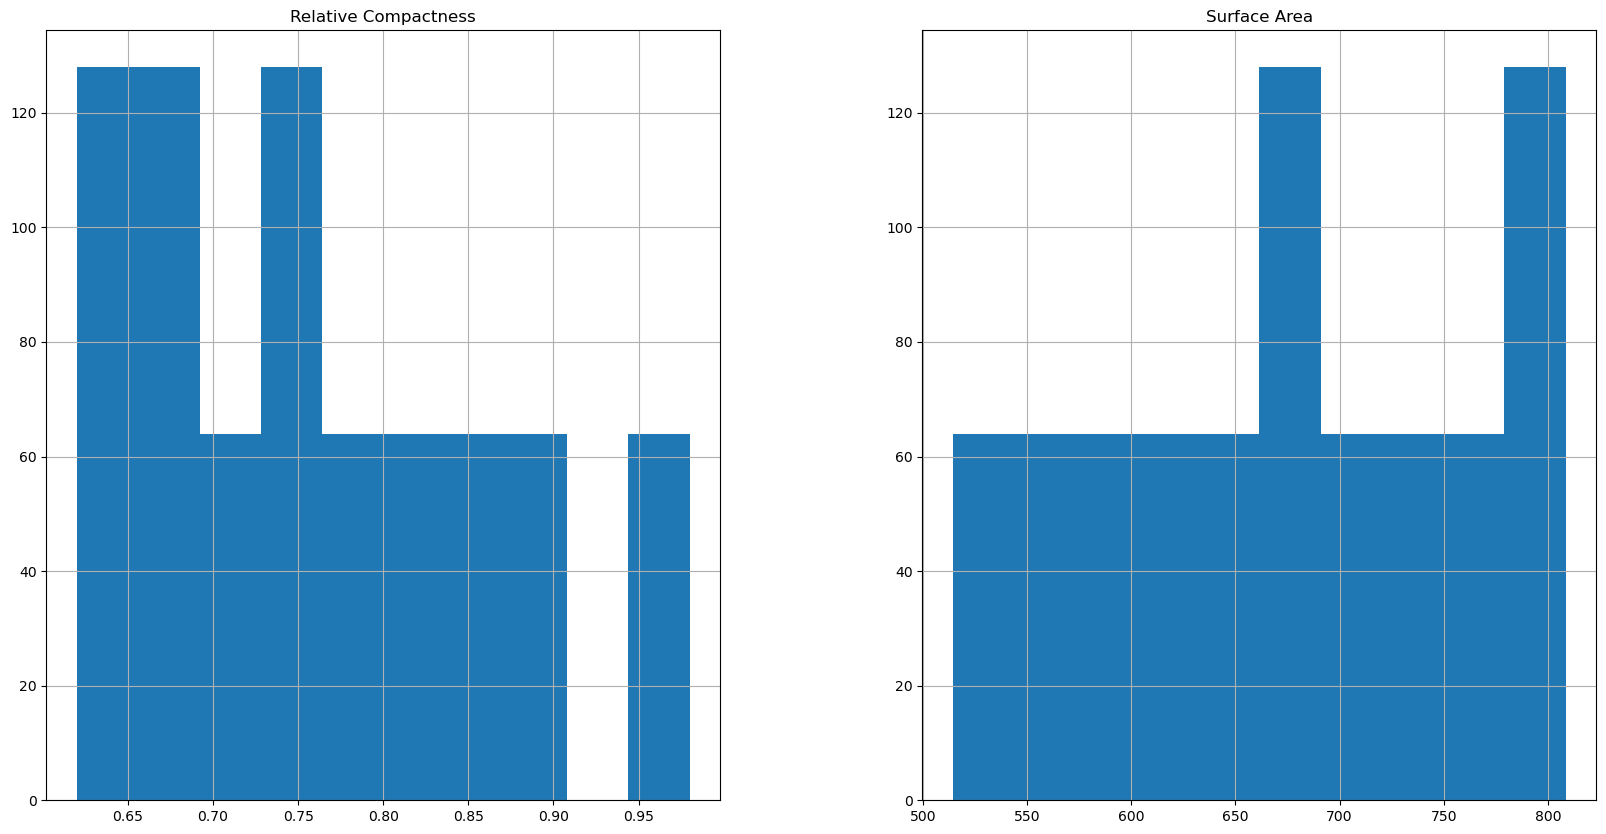

In [15]:
x.hist(figsize=(20,10))

From the histograms, we can see that the range of the 2 features is very different and hence we scale both the features to lie in a range of 0 to 1 by performing Min-max scaling on the data. Python provides inbuilt libraries to perform feature scaling. We need to import MinMaxS-caler from sklearn.preprocessing and proceed as shown below. x contains the data to be scaled. scaler.fit_transform(x) performs the scaling on the data.

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled=pd.DataFrame(scaler.fit_transform(x),
                    columns=["Scaled Relative Compactness",
                            "Scaled Surface Area"])

You can see the scaled data below.

In [18]:
scaled.head()

,Scaled Relative Compactness,Scaled Surface Area
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,1.000000,0.000000
4,0.777778,0.166667


Let us plot the scaled data to see the difference from the previous histograms. Notice that both features now have a comparable range.

array([[<Axes: title={'center': 'Scaled Relative Compactness'}>,
        <Axes: title={'center': 'Scaled Surface Area'}>]], dtype=object)

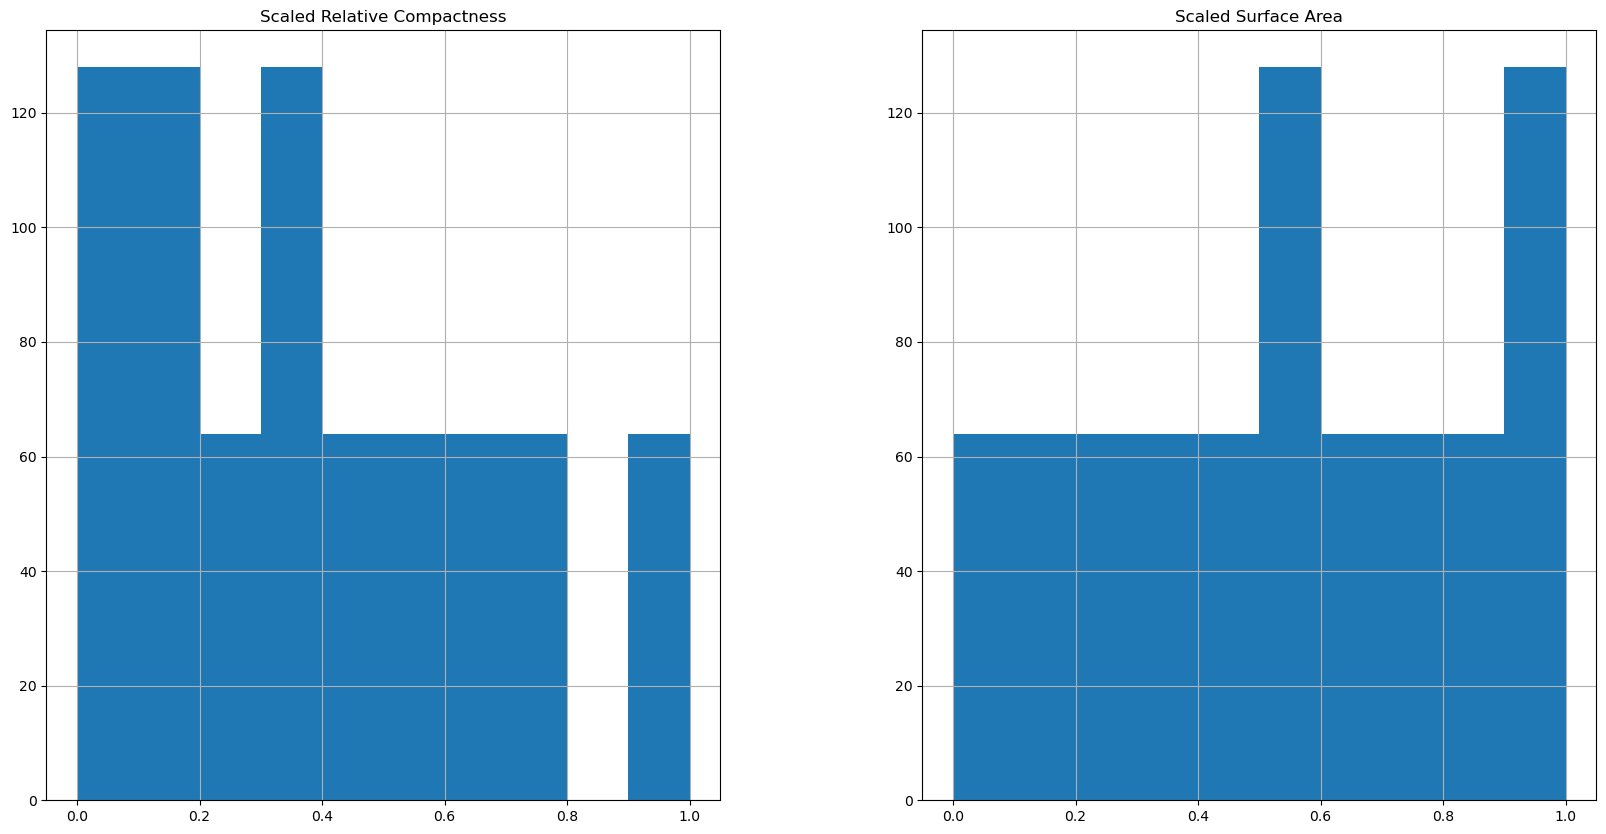

In [20]:
scaled[["Scaled Relative Compactness",
        "Scaled Surface Area"]].hist(figsize=(20,10))

# 2 Feature Clipping

To download the data for this task, click [here](https://www.kaggle.com/datasets/dgawlik/nyse). This dataset consists of data about stock prices such as opening and closing prices of stocks. Let us load the dataset and see a sample.

In [21]:
stocks=pd.read_csv("prices-split-adjusted.csv")

In [23]:
stocks.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


‘open’ column is the opening prices of stocks, so let us rename this column

In [26]:
stocks.rename(columns={"open":"Opening Prices of Stocks"},inplace=True)

Plotting the histogram for the opening prices of stocks.

array([[<Axes: title={'center': 'Opening Prices of Stocks'}>]],
      dtype=object)

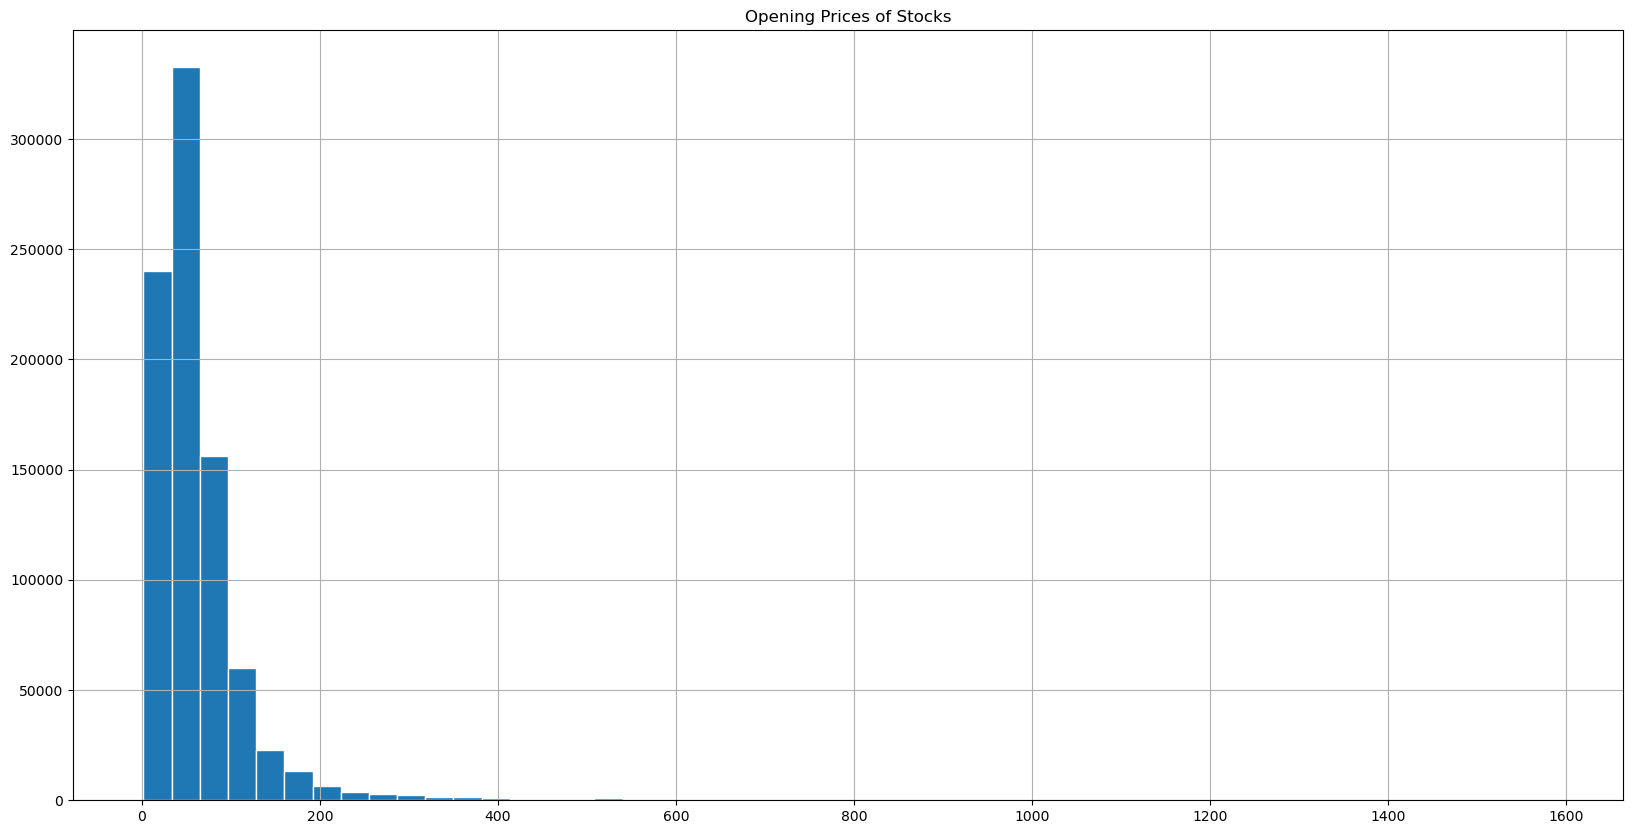

In [27]:
stocks.hist(column="Opening Prices of Stocks",bins=50,
            edgecolor="white", figsize=(20,10))

There are outliers in the data which can be clipped to a fixed value, 400 in this case.

In [28]:
stocks.loc[stocks["Opening Prices of Stocks"]>400]=400

Let us see the plot again after Feature clipping.

array([[<Axes: title={'center': 'Opening Prices of Stocks'}>]],
      dtype=object)

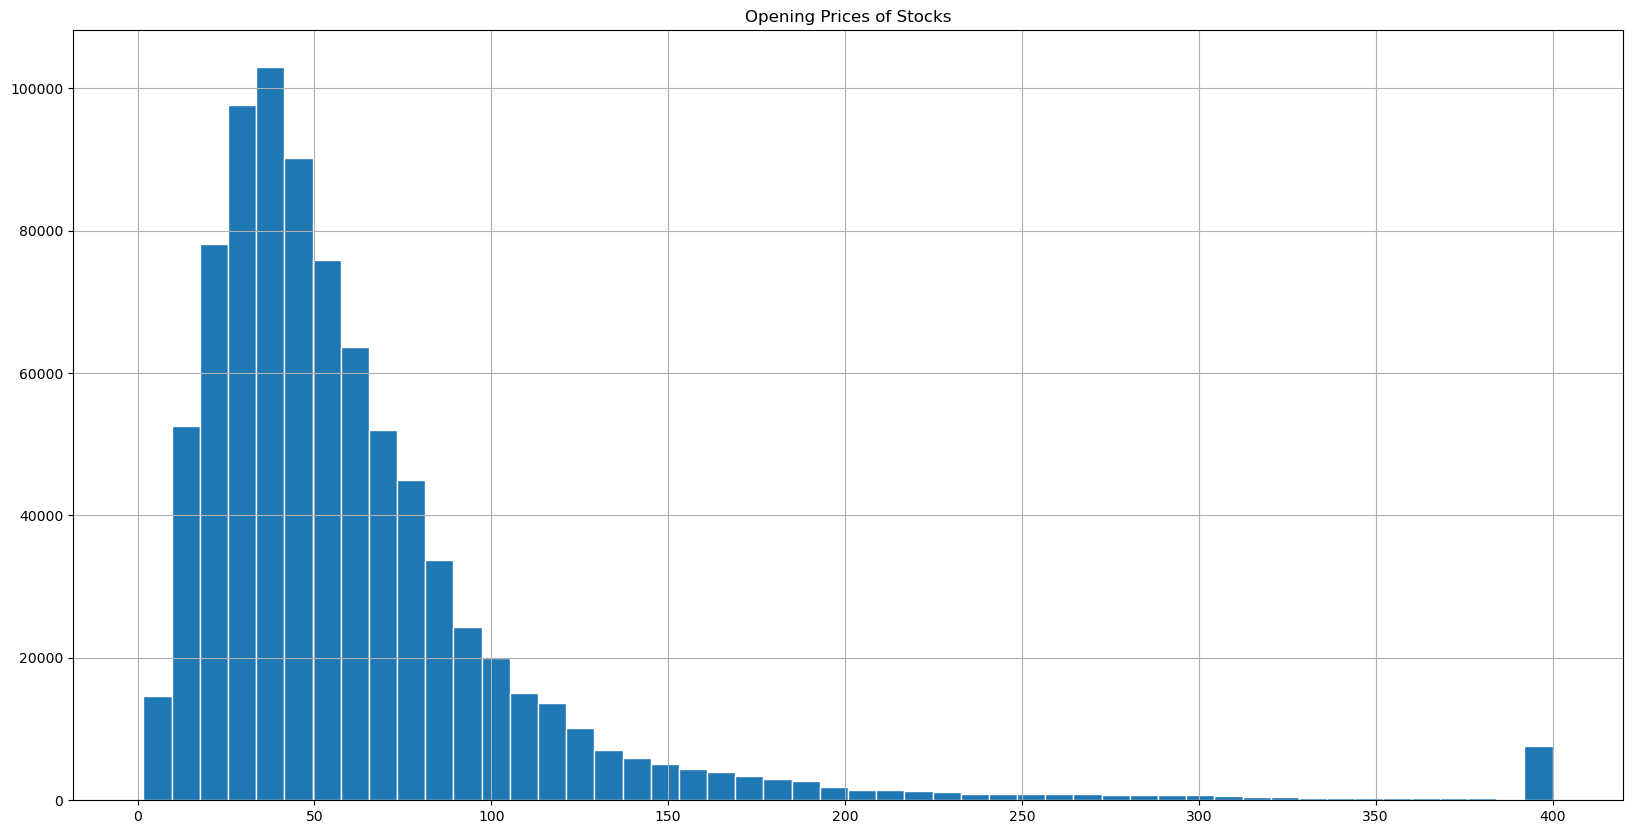

In [31]:
stocks.hist(column="Opening Prices of Stocks",bins=50,
          edgecolor="white",figsize=(20,10))

The outliers have been clipped to a fixed value of 400.

# 3 Log Transform

To download the data for this task, click [here](https://github.com/sivabalanb/Data-Analysis-with-Pandas-and-Python/blob/master/nba.csv).

Go to ‘Raw’ on the top right side and save it to your local system with .csv extension. Load the dataset into a DataFrame and see the results of .head()

In [32]:
salary = pd.read_csv("nba.csv")

In [33]:
salary.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


Using the column Salary, let us plot a histogram to see the data distribution. The data is seen to follow a power law distribution.

array([[<Axes: title={'center': 'Salary'}>]], dtype=object)

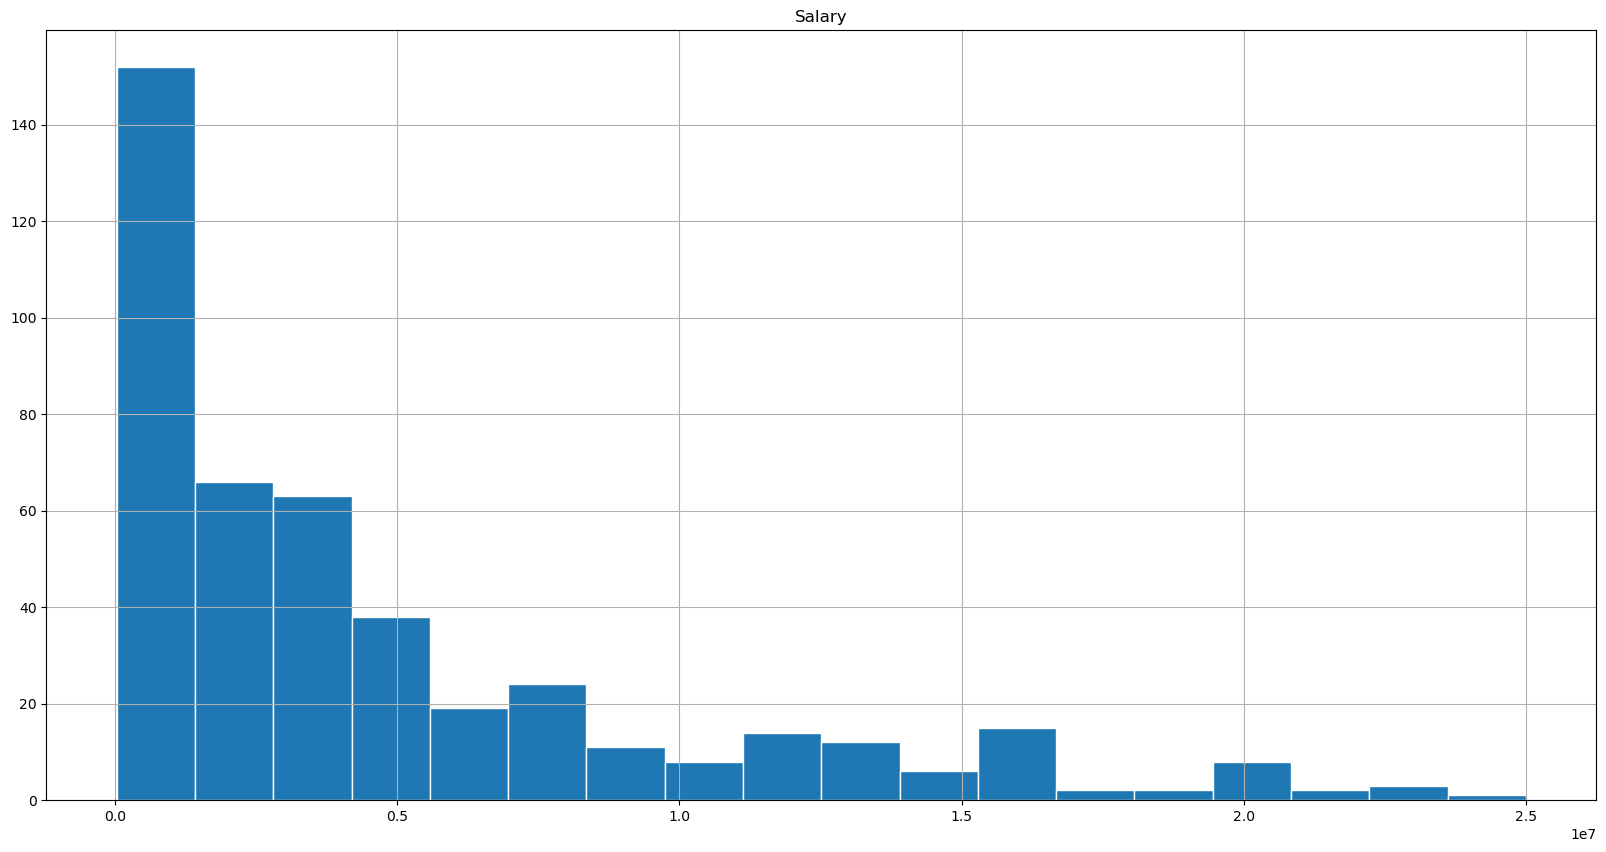

In [34]:
salary.hist(column="Salary",bins="auto",edgecolor="white", figsize=(20,10))

Let us apply log base 10 to all the values in the column Salary and store it in a new column in the DataFrame named Log salary.

In [35]:
salary["Log salary"]=np.log10(salary["Salary"])

Let us now plot Log salary to see the change in data distribution. We use matplotlib to do so,because we need to customise the x axis markings on the plot.

(array([ 1.,  2.,  4.,  8., 10., 13., 25., 89., 47., 63., 63., 46., 44.,
        31.]),
 array([4.48978979, 4.6975148 , 4.90523982, 5.11296484, 5.32068985,
        5.52841487, 5.73613988, 5.9438649 , 6.15158991, 6.35931493,
        6.56703995, 6.77476496, 6.98248998, 7.19021499, 7.39794001]),
 <BarContainer object of 14 artists>)

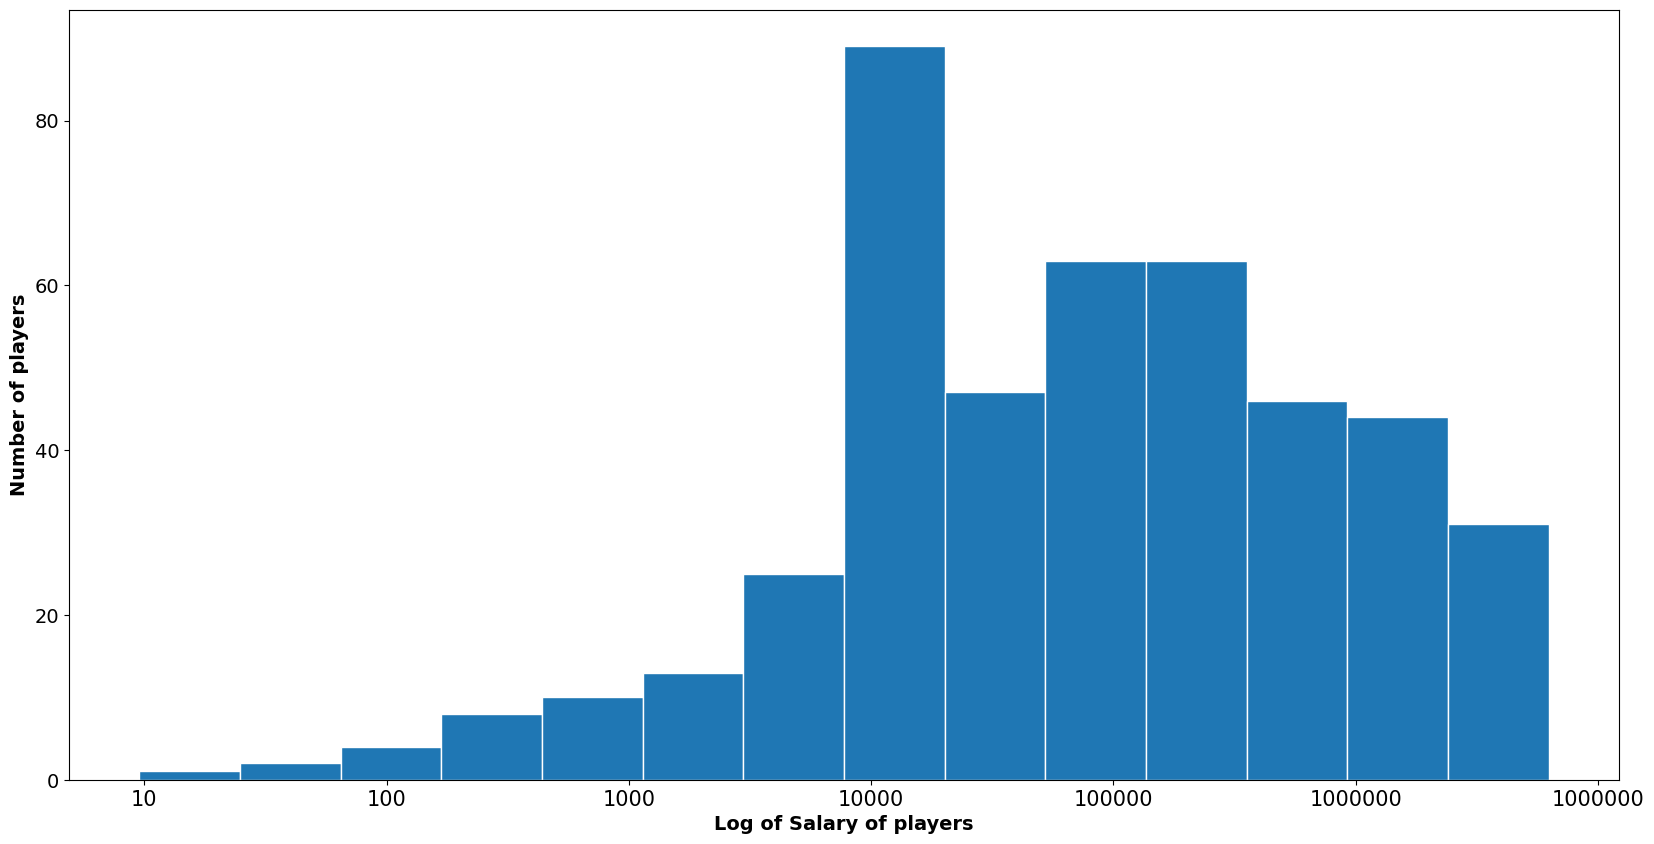

In [37]:
x= salary["Log salary"]
plt.figure(figsize=(20,10))
plt.xticks([4.5,5.0,5.5,6.0,6.5,7,7.5], 
           ["10","100","1000","10000","100000",
            "1000000","1000000"], fontsize=15)
plt.yticks(fontsize=14)
plt.xlabel("Log of Salary of players", fontsize =14, 
           fontweight="bold")
plt.ylabel("Number of players",fontsize=14,fontweight="bold")
plt.hist(x,bins="auto", edgecolor="white")

# 4 Z-Score Normalisation

To download the data for this task, click [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data). This dataset is about automobiles. The NA values are represented by ‘?’ for this dataset, so while loading the data, we are specifying na_values.

In [38]:
auto= pd.read_csv("imports-85.csv",header=None,na_values="?")
auto.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


From the link for the dataset, we know that 10th column in the dataset refers to wheelbase forcars. Let us see a histogram for that column.

<Axes: >

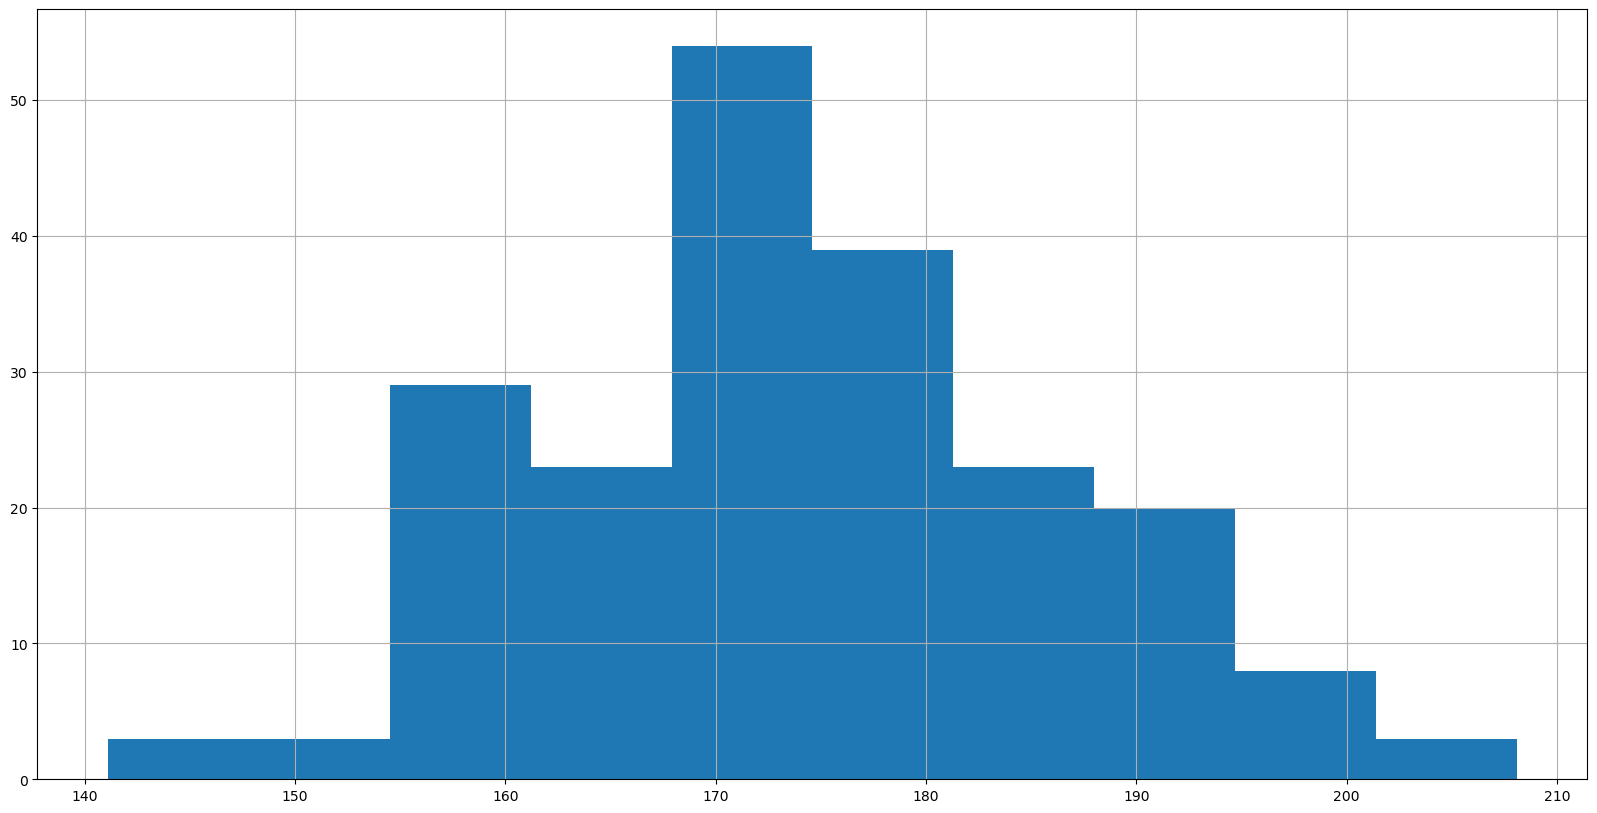

In [39]:
auto[10].hist(figsize=(20,10))

The data is close to a normal distribution. To normalise this data, we can use z-score normalisationor standardisation on the data. Let us first convert this feature to a DataFrame, named Data, sinceit is a requirement for the library used for standardisation.

In [40]:
data=pd.DataFrame(auto[10])

To perform standardisation, we import StandardScaler form the library, sklearn.preprocessing.scaler.fit_transform(data) performs standardisation and the result is saved in data_N.

In [42]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler=StandardScaler()
data_N=scaler.fit_transform(data)

Plotting a histogram of data_N, we see that it follows a standard normal distribution.

(array([ 3.,  3., 20., 11., 35., 40., 36., 10., 31.,  5.,  8.,  3.]),
 array([-2.67724367, -2.22357824, -1.76991282, -1.31624739, -0.86258197,
        -0.40891654,  0.04474888,  0.49841431,  0.95207973,  1.40574516,
         1.85941058,  2.31307601,  2.76674143]),
 <BarContainer object of 12 artists>)

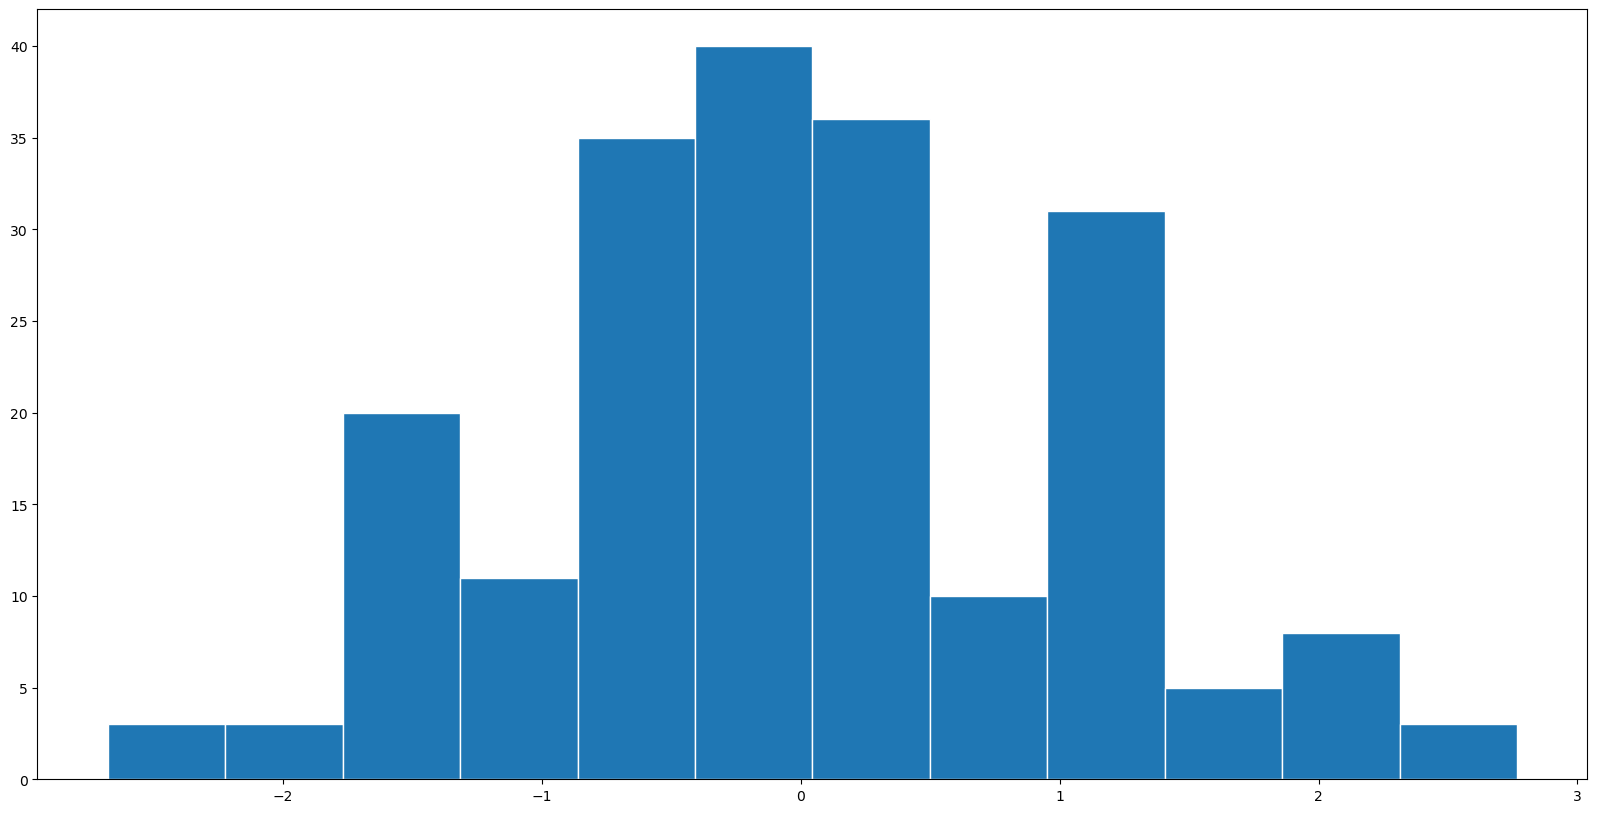

In [46]:
plt.figure(figsize=(20,10))
plt.hist(data_N,bins="auto",edgecolor="white")

We can also find the mean and standard deviation of the standardised data as shown.

In [47]:
round(data_N.std())

1

In [48]:
round(data_N.mean())

0